In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
transform = transforms.ToTensor()

mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

data_loader = torch.utils.data.DataLoader(dataset=mnist_data, batch_size=64)

In [3]:
data_iter = iter(data_loader)
images, labels = data_iter.next()
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


In [4]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128), # N,784 -> N,128
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12)
        )
        self.decoder = nn.Sequential(
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Note: [-1, 1] -> nn.Tanh

In [5]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [6]:
epochs = 20
outputs = []
for epoch in range(epochs):
    for (img, _) in data_loader:
        img = img.reshape(-1, 28*28)
        optimizer.zero_grad()
        y_hat = model(img)
        loss = criterion(y_hat, img)
        loss.backward()
        optimizer.step()
    outputs.append((epoch, img, y_hat))
    if epoch % 4 == 0:
            print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 0.03662964329123497
epoch 4, loss 0.02340116538107395
epoch 8, loss 0.019894255325198174
epoch 12, loss 0.017522647976875305
epoch 16, loss 0.016837244853377342


In [7]:
torch.save(model.state_dict(), 'model/ae_model_param.pkl')

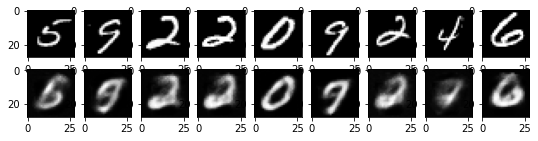

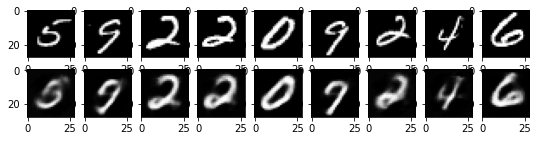

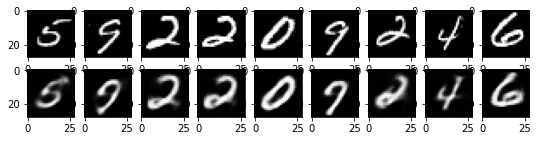

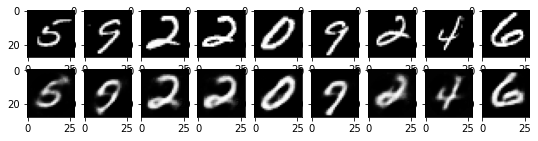

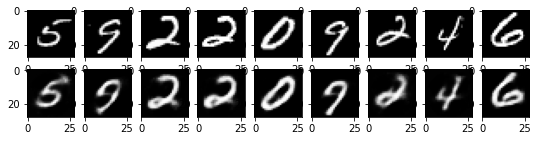

In [8]:
for k in range(0, epochs, 4):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    y_hat = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        item = item.reshape(-1, 28, 28)
        # item 1, 28, 28
        plt.imshow(item[0])
    for i, item in enumerate(y_hat):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1)    # row_length + i + 1
        item = item.reshape(-1, 28, 28)
        # item: 1, 28, 28
        plt.imshow(item[0])

    plt.savefig('img/result_'+str(k)+'.png')